### Import libraries and data

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)
import numpy as np

In [2]:
google_data = pd.read_csv('C:/Users/srava/OneDrive/Documents/Capstone_2/googleplaystore.csv')

### Basic exploration

In [3]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [4]:
google_data.shape

(10841, 13)

In [5]:
google_data.info()  # Rating , Current Ver,  Android Ver are have missing valuse

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Missing values

In [6]:
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

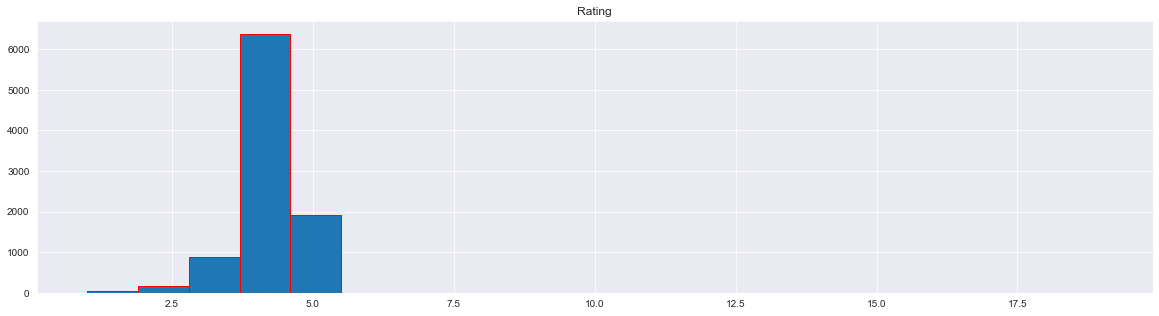

In [7]:
google_data.hist(edgecolor="red", bins=20) # data is skewed with values greater than 5

<AxesSubplot:>

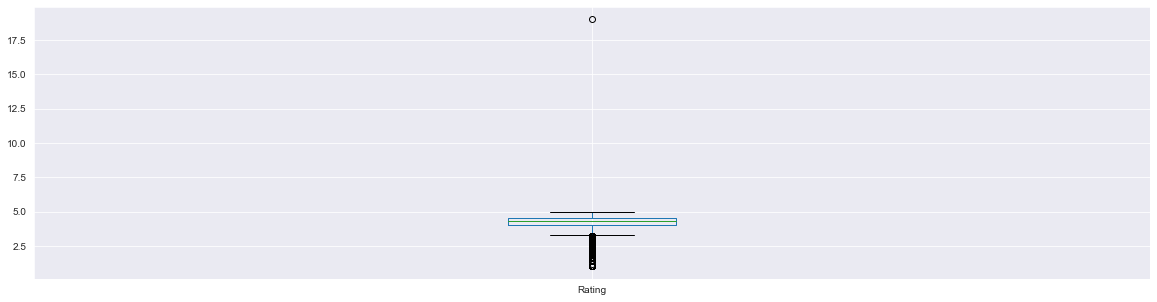

In [8]:
google_data.boxplot() # there is one outlier in Rating column  

In [9]:
google_data[google_data['Rating']>5] # rating > 5 is not making any sence so want to remove that

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [10]:
index = (google_data['Rating']<=5) | (google_data['Rating'].isna())

In [11]:
# I will only keep rating values that are valid
google_data = google_data[index]

In [12]:
#google_data.drop([10472], inplace =True) # droping the row has index number 10472, which has rating >5

In [13]:
google_data.shape

(10840, 13)

<AxesSubplot:>

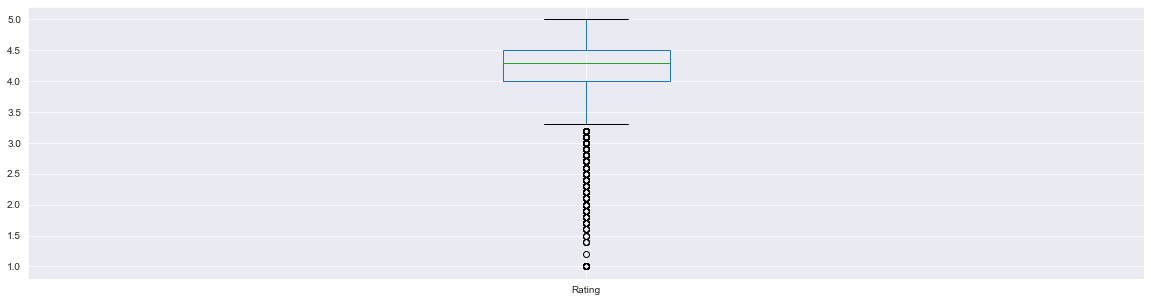

In [14]:
google_data.boxplot() # most of the rating values are in between 4, 4.5

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

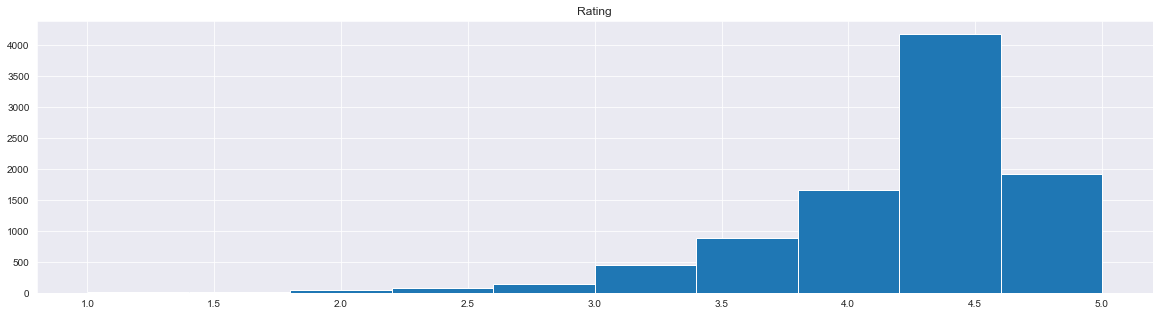

In [15]:
google_data.hist() # data is left skewed, so we need to replace the null values with median

In [16]:
threshold = len(google_data)*0.1
threshold

1084.0

In [17]:
google_data.dropna(thresh= threshold, axis = 1, inplace = True) # droping the column which has values less than 10%

import warnings 
warnings.filterwarnings('ignore')

In [18]:
google_data.shape

(10840, 13)

### Data Manipulation
#### Fill the null values with appropriate values using mean, median, mode

In [19]:
google_data["Rating"] = google_data["Rating"].fillna(value=google_data["Rating"].median()) #fill null values with median

In [20]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [21]:
print(google_data['Type'].mode())
print(google_data['Current Ver'].mode())
print(google_data['Android Ver'].mode())
print(google_data['Price'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object
0    0
dtype: object


In [22]:
google_data['Type'].mode()[0]

'Free'

In [23]:
google_data['Type'].fillna(google_data['Type'].mode()[0], inplace=True)

In [24]:
google_data['Current Ver'].fillna(google_data['Current Ver'].mode()[0], inplace=True)
google_data['Android Ver'].fillna(google_data['Android Ver'].mode()[0], inplace=True)

In [25]:
google_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Change data types

In [26]:
google_data["Price"] = google_data["Price"].str.replace("$","").astype(float)
google_data["Price"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10840, dtype: float64

In [27]:
google_data["Reviews"]  = google_data["Reviews"].astype(int)
google_data["Reviews"] 

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: int32

In [28]:
google_data["Installs"] = google_data["Installs"].str.replace("+","")

In [29]:
google_data["Installs"] = google_data["Installs"].str.replace(",","")

In [30]:
google_data["Installs"] = google_data["Installs"].astype(float)

In [31]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


### What variables correlate with ratings??

In [32]:
numerics = google_data.select_dtypes(include = "number")

In [52]:
payed = numerics[numerics["Price"] > 0]
free = numerics[numerics["Price"] == 0]

In [55]:
y = payed["Rating"]
X = payed.drop("Rating", axis = 1)

In [35]:
X.head()

,Reviews,Installs,Price
234,11442,100000.0,4.99
235,10295,100000.0,4.99
290,11442,100000.0,4.99
291,10295,100000.0,4.99
427,18247,100000.0,3.99


In [36]:
import statsmodels.api as sm

In [37]:
X = sm.add_constant(X)
X.head()

,const,Reviews,Installs,Price
234,1.0,11442,100000.0,4.99
235,1.0,10295,100000.0,4.99
290,1.0,11442,100000.0,4.99
291,1.0,10295,100000.0,4.99
427,1.0,18247,100000.0,3.99


In [38]:
mod = sm.OLS(y, X)

In [39]:
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.779
Date:                Sun, 26 Sep 2021   Prob (F-statistic):             0.0104
Time:                        22:16:13   Log-Likelihood:                -562.37
No. Observations:                 800   AIC:                             1133.
Df Residuals:                     796   BIC:                             1151.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2811      0.018    237.256      0.0

## Data Visualization
### Category wise Analysis

In [48]:
grp = google_data.groupby('Category') # group by category
x = grp['Rating'].agg(np.mean).sort_values(ascending = False)
y = grp['Reviews'].agg(np.mean).sort_values(ascending = False)
z = grp['Price'].agg(np.sum).sort_values(ascending = False) # how much money this category apps made.
print(x)
print(y)
print(z)

Category
EVENTS                 4.395313
EDUCATION              4.388462
ART_AND_DESIGN         4.355385
BOOKS_AND_REFERENCE    4.335498
PERSONALIZATION        4.328827
PARENTING              4.300000
GAME                   4.286888
BEAUTY                 4.283019
HEALTH_AND_FITNESS     4.280059
SHOPPING               4.263077
SOCIAL                 4.261017
WEATHER                4.248780
SPORTS                 4.236458
PRODUCTIVITY           4.226651
MEDICAL                4.216199
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
AUTO_AND_VEHICLES      4.205882
FAMILY                 4.204564
PHOTOGRAPHY            4.197910
FOOD_AND_DRINK         4.185827
BUSINESS               4.182391
COMMUNICATION          4.180103
NEWS_AND_MAGAZINES     4.161837
COMICS                 4.160000
FINANCE                4.151639
TRAVEL_AND_LOCAL       4.132946
LIFESTYLE              4.131414
ENTERTAINMENT          4.126174
VIDEO_PLAYERS          4.084000
TOOLS                  4.080071

## Which category apps have highest ratings?

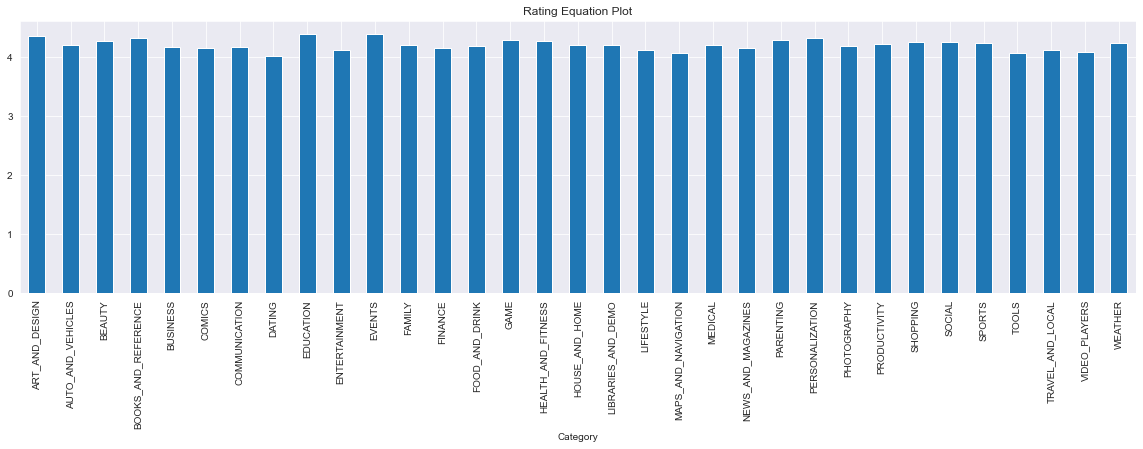

In [41]:
x.plot(kind ='bar')
plt.title('Rating Equation Plot')
plt.show()

## Which category apps have more reviews?

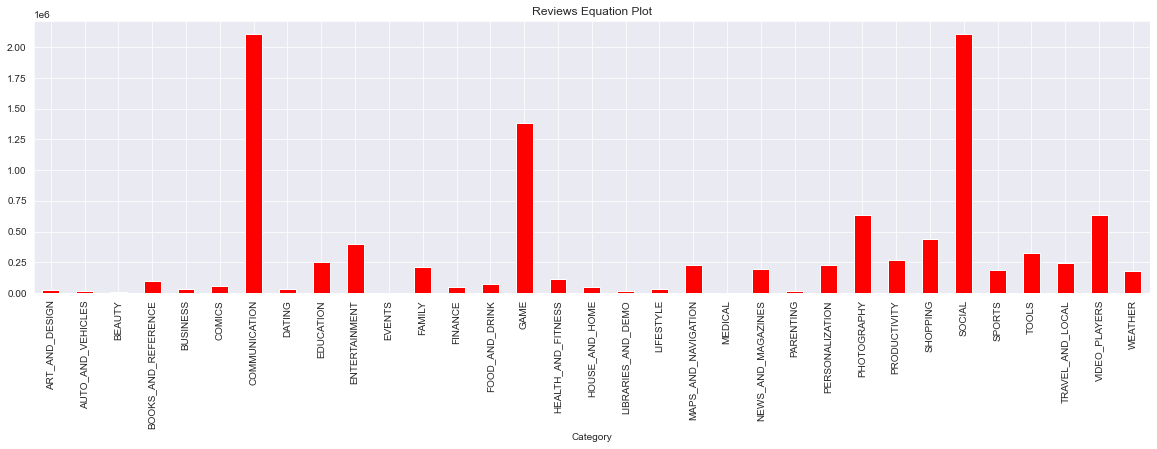

In [42]:
y.plot(kind ='bar', color ='red')
plt.title('Reviews Equation Plot')
plt.show()

## Which category apps are people buying more?

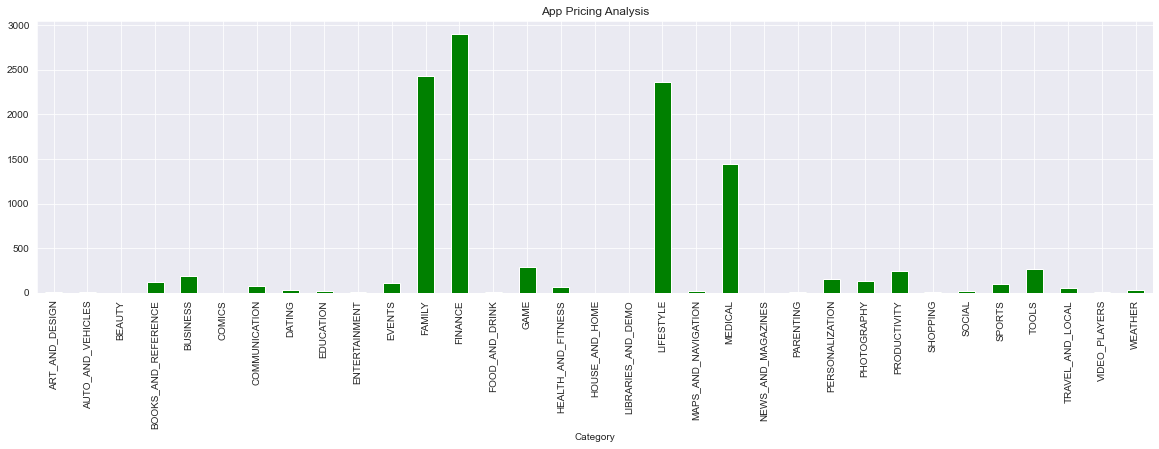

In [43]:
z.plot(kind ='bar', color ='green')
plt.title('App Pricing Analysis')
plt.show()